# **Movie Recommendation System**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
ratings_df = pd.read_csv('/content/ratings_small.csv')
movies_df = pd.read_csv('/content/movies_metadata.csv')

In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28070 entries, 0 to 28069
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  28070 non-null  object 
 1   belongs_to_collection  3172 non-null   object 
 2   budget                 28070 non-null  object 
 3   genres                 28070 non-null  object 
 4   homepage               4540 non-null   object 
 5   id                     28070 non-null  object 
 6   imdb_id                28058 non-null  object 
 7   original_language      28067 non-null  object 
 8   original_title         28070 non-null  object 
 9   overview               27793 non-null  object 
 10  popularity             28068 non-null  float64
 11  poster_path            27921 non-null  object 
 12  production_companies   28068 non-null  object 
 13  production_countries   28068 non-null  object 
 14  release_date           28039 non-null  object 
 15  re

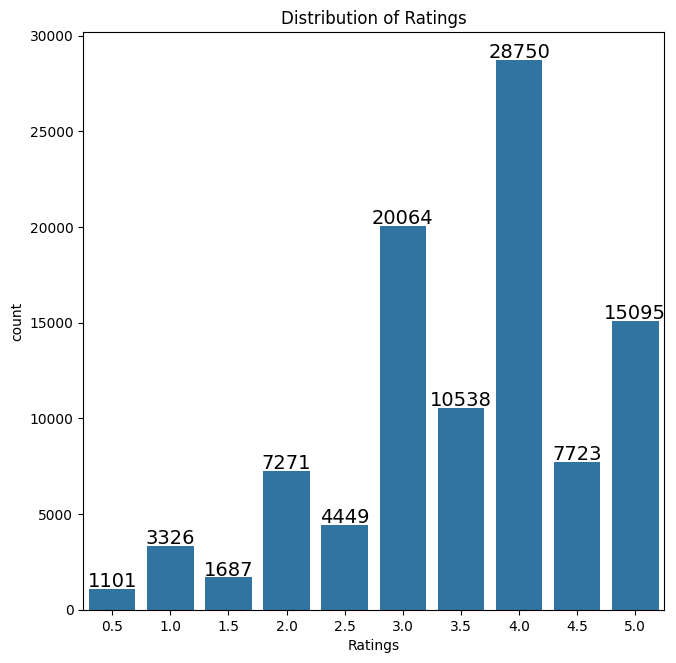

In [10]:
plt.figure(figsize=(7.5,7.5))
ax = sns.countplot(data=ratings_df, x='rating')
labels = (ratings_df['rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

In [11]:
title_mask = movies_df['title'].isna()

movies_df = movies_df.loc[title_mask == False]

movies_df = movies_df.astype({'id': 'int64'})

df = pd.merge(ratings_df, movies_df[['id', 'title']], left_on='movieId', right_on='id')
df.head()

,userId,movieId,rating,timestamp,id,title
0,1,1371,2.5,1260759135,1371,Rocky III
1,4,1371,4.0,949810302,1371,Rocky III
2,7,1371,3.0,851869160,1371,Rocky III
3,19,1371,4.0,855193404,1371,Rocky III
4,21,1371,3.0,853852263,1371,Rocky III


In [12]:
df.drop(['timestamp', 'id'], axis=1, inplace=True)

df = df.drop_duplicates(['userId','title'])

df_pivot = df.pivot(index='userId', columns='title', values='rating').fillna(0)

df_pivot = df_pivot.astype('int64')

In [13]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)

In [14]:
df_pivot.head()

title,!Women Art Revolution,'Twas the Night Before Christmas,...And God Created Woman,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,13 Tzameti,1408,...,Zatôichi's Pilgrimage,Zazie dans le métro,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from mlxtend.frequent_patterns import apriori

frequent_itemset = apriori(df_pivot, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [17]:
frequent_itemset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.129657,"(20,000 Leagues Under the Sea)"
1,0.129657,(2001: A Space Odyssey)
2,0.298063,(48 Hrs.)
3,0.292101,(5 Card Stud)
4,0.093890,(A Brief History of Time)


In [18]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(20,000 Leagues Under the Sea)",(48 Hrs.),0.129657,0.298063,0.076006,0.586207,1.966724,0.037360,1.696349,0.564766
1,(48 Hrs.),"(20,000 Leagues Under the Sea)",0.298063,0.129657,0.076006,0.255000,1.966724,0.037360,1.168245,0.700262
2,"(20,000 Leagues Under the Sea)",(A Nightmare on Elm Street),0.129657,0.266766,0.081967,0.632184,2.369807,0.047379,1.993480,0.664134
3,(A Nightmare on Elm Street),"(20,000 Leagues Under the Sea)",0.266766,0.129657,0.081967,0.307263,2.369807,0.047379,1.256382,0.788322
4,"(20,000 Leagues Under the Sea)",(Back to the Future Part II),0.129657,0.210134,0.077496,0.597701,2.844379,0.050251,1.963381,0.745028


In [20]:
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63652,(On Guard),"(The Garden of Eden, Muxmäuschenstill)",0.087928,0.099851,0.070045,0.796610,7.977991,0.061265,4.425733,0.958976
63649,"(The Garden of Eden, Muxmäuschenstill)",(On Guard),0.099851,0.087928,0.070045,0.701493,7.977991,0.061265,3.055440,0.971678
167792,"(Rope, Big Fish)","(Psycho, All the Way Boys)",0.092399,0.095380,0.070045,0.758065,7.947833,0.061232,3.739096,0.963176
167797,"(Psycho, All the Way Boys)","(Rope, Big Fish)",0.095380,0.092399,0.070045,0.734375,7.947833,0.061232,3.416849,0.966350
167793,"(Rope, Psycho)","(Big Fish, All the Way Boys)",0.098361,0.093890,0.070045,0.712121,7.584656,0.060810,3.147541,0.962863


In [21]:
df_MIB = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Men in Black II')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
df_MIB = df_MIB[df_MIB['lift'] > 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df_MIB.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
57033,(Men in Black II),"(Nostalgia, Terminator 3: Rise of the Machines)",0.33383,0.080477,0.077496,0.232143,2.884590,0.050631,1.197518,0.980726
51148,(Men in Black II),"(Jarhead, Sleepless in Seattle)",0.33383,0.077496,0.073025,0.218750,2.822716,0.047155,1.180805,0.969319
873343,(Men in Black II),"(Young and Innocent, The Talented Mr. Ripley, ...",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865
318284,(Men in Black II),"(Point Break, The Talented Mr. Ripley, Young a...",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865
57039,(Men in Black II),"(The 39 Steps, Nostalgia)",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865


In [24]:
movies = df_MIB['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
movie_list[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Nostalgia',
 'Terminator 3: Rise of the Machines',
 'Jarhead',
 'Sleepless in Seattle',
 'Young and Innocent',
 'The Talented Mr. Ripley',
 'Point Break',
 'The 39 Steps',
 'Once Were Warriors',
 'The Thomas Crown Affair']